#### INSS. Stages model evaluation

In [1]:
#Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score,confusion_matrix


In [2]:
#En son veriler
X_train=pd.read_csv("X_train.csv", index_col="ID")
X_test=pd.read_csv("X_test.csv", index_col="ID")
y_train=pd.read_csv("y_train.csv", index_col="ID")
y_test=pd.read_csv("y_test.csv", index_col="ID")

In [3]:
####train encoding
y_train_inss=y_train["INSS.Stage"]
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the class labels to numeric values
y_train_inss_encode = label_encoder.fit_transform(y_train_inss)

# Now, if you want to get the original labels from the encoded values:
original_labels = label_encoder.inverse_transform(y_train_inss_encode)
y_train_inss_encode.shape

(298,)

In [4]:
y_train_inss.value_counts()

INSS.Stage
4     151
1      96
4S     39
3       9
2       3
Name: count, dtype: int64

In [5]:
#### test encoding
y_test_inss=y_test["INSS.Stage"]
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the class labels to numeric values
y_test_inss_encode = label_encoder.fit_transform(y_test_inss)

# Now, if you want to get the original labels from the encoded values:
original_labels = label_encoder.inverse_transform(y_test_inss_encode)
y_test_inss_encode.shape

(75,)

In [6]:
#### Import selected features for INSS
selected_features_inss = pd.read_csv("final_common_features_for_INSS.csv",index_col=False)
#### Put them in a list
selected_features = selected_features_inss['FeatureName'].tolist()

#### selected feature matrix for X_train
X_train_sub_inss = X_train[selected_features]
print(X_train_sub_inss.shape)

#### selected feature matrix for X_train
X_test_sub_inss = X_test[selected_features]
print(X_test_sub_inss.shape)

(298, 143)
(75, 143)


#### RANDOM FOREST MODEL EVALUATION FOR SELECTED FEATURES

Confusion Matrix:
     1  2  3   4  4S
1   22  0  0   2   0
2    0  0  0   2   0
3    0  0  0   6   0
4    1  0  0  29   0
4S  10  0  0   2   1
Accuracy: 0.6933333333333334
Precision: 0.6933333333333334
Recall: 0.6933333333333334
F1-score: 0.6933333333333334
ROC-AUC: 0.8885333333333333
PR-AUC: 0.6756805199724005


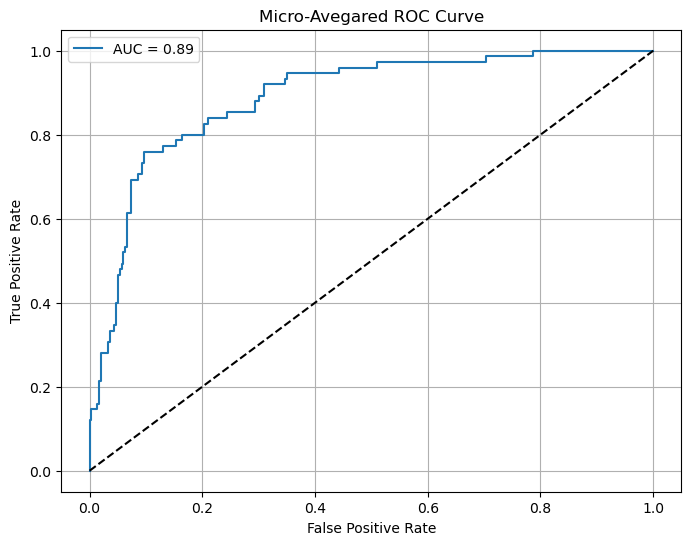

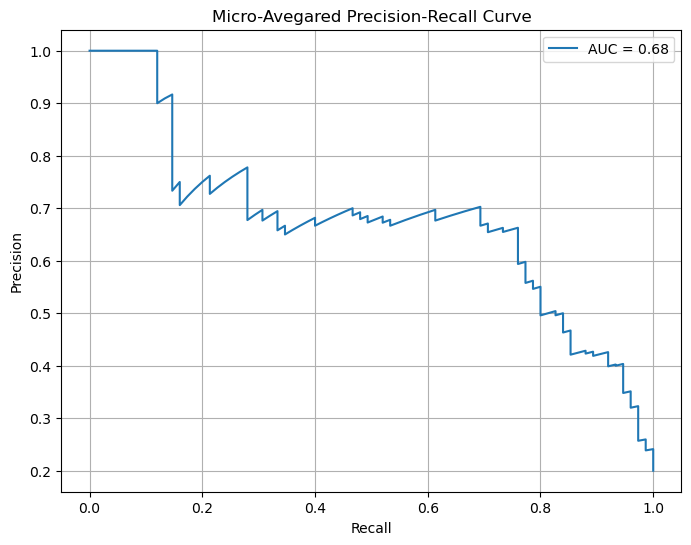

In [7]:
# Create a classifier
best_params= {'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 300}
clf = RandomForestClassifier(**best_params, random_state=42)

X_train=X_train_sub_inss.copy()
X_test=X_test_sub_inss.copy()
y_train= y_train_inss_encode.copy()
y_test= y_test_inss_encode.copy()
original_labels = label_encoder.inverse_transform(y_test_inss_encode)
class_labels= np.unique(original_labels)

# Train the Random Forest classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_probs = clf.predict_proba(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

# Calculate ROC-AUC for this fold
y_true_binary = np.zeros_like(y_pred_probs)
y_true_binary[np.arange(y_pred_probs.shape[0]), y_test] = 1
fpr, tpr, _ = roc_curve(y_true_binary.ravel(), y_pred_probs.ravel())
roc_auc = roc_auc_score(y_true_binary.ravel(), y_pred_probs.ravel())

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
print("Confusion Matrix:")
print(confusion_matrix_df)

# Calculate Precision-Recall values
precision_fold, recall_fold, _ = precision_recall_curve(y_true_binary.ravel(), y_pred_probs.ravel())

# Calculate PR-AUC for this fold
pr_auc = average_precision_score(y_true_binary.ravel(), y_pred_probs.ravel())

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)
print("PR-AUC:", pr_auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-Avegared ROC Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_fold, precision_fold, label=f'AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Micro-Avegared Precision-Recall Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

#### SVM MODEL EVALUATION FOR SELECTED FEATURES

Confusion Matrix:
     1  2  3   4  4S
1   20  0  0   3   1
2    0  0  0   2   0
3    0  0  0   6   0
4    1  0  0  29   0
4S   6  0  0   3   4
Accuracy: 0.7066666666666667
Precision: 0.7066666666666667
Recall: 0.7066666666666667
F1-score: 0.7066666666666667
ROC-AUC: 0.9070222222222222
PR-AUC: 0.7248283126995202


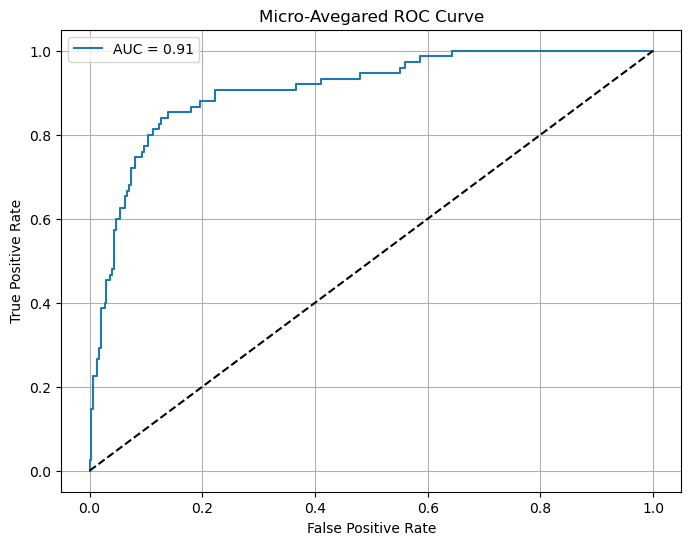

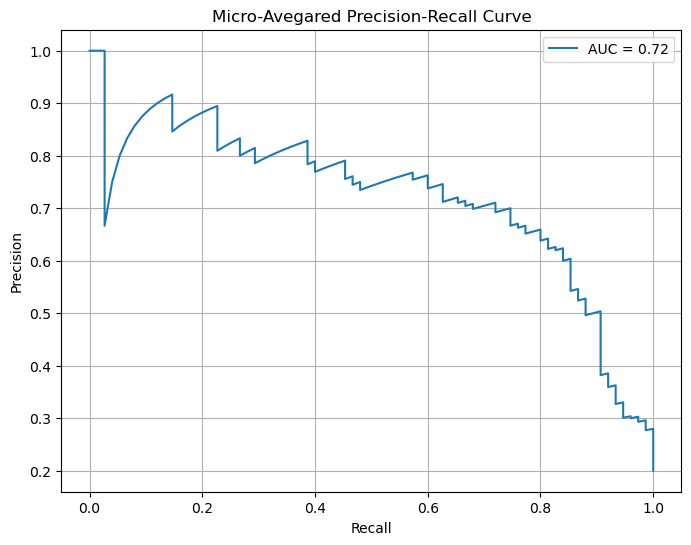

In [8]:
# Create a classifier
best_params= {'C': 4.217350224832889, 'gamma': 0.00695545179780025}
clf = SVC(**best_params, random_state=42,probability=True)

X_train=X_train_sub_inss.copy()
X_test=X_test_sub_inss.copy()
y_train= y_train_inss_encode.copy()
y_test= y_test_inss_encode.copy()
original_labels = label_encoder.inverse_transform(y_test_inss_encode)
class_labels= np.unique(original_labels)

# Train the Random Forest classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_probs = clf.predict_proba(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

# Calculate ROC-AUC for this fold
y_true_binary = np.zeros_like(y_pred_probs)
y_true_binary[np.arange(y_pred_probs.shape[0]), y_test] = 1
fpr, tpr, _ = roc_curve(y_true_binary.ravel(), y_pred_probs.ravel())
roc_auc = roc_auc_score(y_true_binary.ravel(), y_pred_probs.ravel())

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
print("Confusion Matrix:")
print(confusion_matrix_df)

# Calculate Precision-Recall values
precision_fold, recall_fold, _ = precision_recall_curve(y_true_binary.ravel(), y_pred_probs.ravel())

# Calculate PR-AUC for this fold
pr_auc = average_precision_score(y_true_binary.ravel(), y_pred_probs.ravel())

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)
print("PR-AUC:", pr_auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-Avegared ROC Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_fold, precision_fold, label=f'AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Micro-Avegared Precision-Recall Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

#### LOGISTIC REGRESSION MODEL EVALUATION FOR SELECTED FEATURES

Confusion Matrix:
     1  2  3   4  4S
1   22  0  0   2   0
2    0  0  0   2   0
3    0  0  0   6   0
4    1  0  0  29   0
4S   9  0  0   2   2
Accuracy: 0.7066666666666667
Precision: 0.7066666666666667
Recall: 0.7066666666666667
F1-score: 0.7066666666666667
ROC-AUC: 0.9090666666666667
PR-AUC: 0.7159644249800088


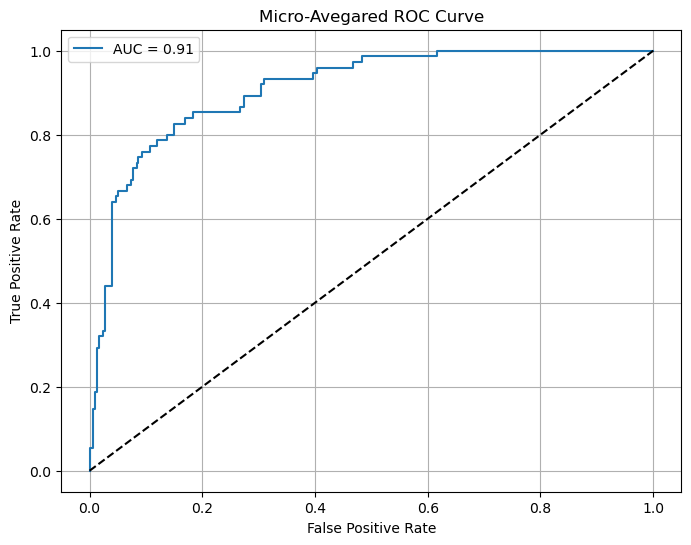

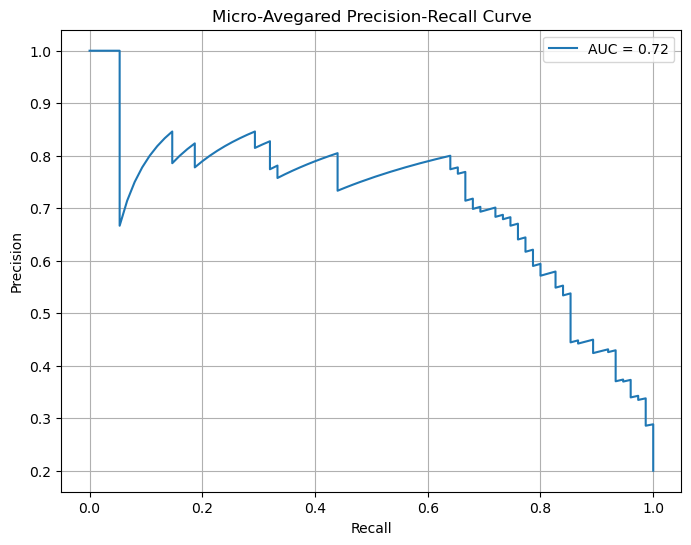

In [9]:
# Create a classifier
best_params= {'C': 0.23357214690901212, 'penalty': 'l1', 'solver': 'liblinear'}
clf = LogisticRegression(**best_params, random_state=42)

X_train=X_train_sub_inss.copy()
X_test=X_test_sub_inss.copy()
y_train= y_train_inss_encode.copy()
y_test= y_test_inss_encode.copy()
original_labels = label_encoder.inverse_transform(y_test_inss_encode)
class_labels= np.unique(original_labels)

# Train the Random Forest classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_probs = clf.predict_proba(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

# Calculate ROC-AUC for this fold
y_true_binary = np.zeros_like(y_pred_probs)
y_true_binary[np.arange(y_pred_probs.shape[0]), y_test] = 1
fpr, tpr, _ = roc_curve(y_true_binary.ravel(), y_pred_probs.ravel())
roc_auc = roc_auc_score(y_true_binary.ravel(), y_pred_probs.ravel())

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
print("Confusion Matrix:")
print(confusion_matrix_df)

# Calculate Precision-Recall values
precision_fold, recall_fold, _ = precision_recall_curve(y_true_binary.ravel(), y_pred_probs.ravel())

# Calculate PR-AUC for this fold
pr_auc = average_precision_score(y_true_binary.ravel(), y_pred_probs.ravel())

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)
print("PR-AUC:", pr_auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-Avegared ROC Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_fold, precision_fold, label=f'AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Micro-Avegared Precision-Recall Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

#### RANDOM FOREST MODEL EVALUATION FOR ALL FEATURES

Confusion Matrix:
     1  2  3   4  4S
1   22  0  0   2   0
2    0  0  0   2   0
3    0  0  0   6   0
4    1  0  0  29   0
4S   9  0  0   3   1
Accuracy: 0.6933333333333334
Precision: 0.6933333333333334
Recall: 0.6933333333333334
F1-score: 0.6933333333333334
ROC-AUC: 0.8916444444444445
PR-AUC: 0.6795105726004552


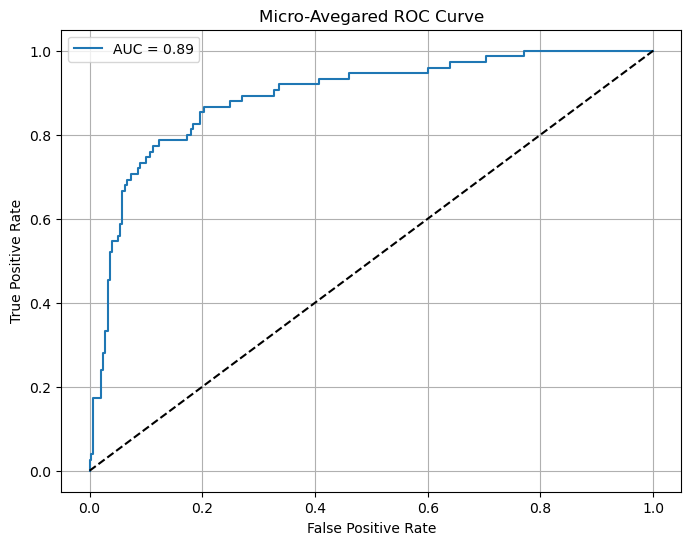

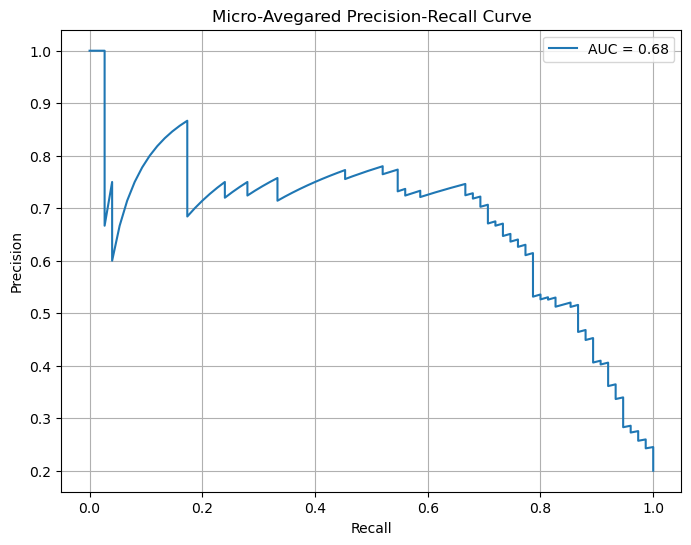

In [10]:
# Create a classifier
best_params= {'max_depth': 7, 'min_samples_split': 5, 'n_estimators': 100}
clf = RandomForestClassifier(**best_params, random_state=42)

X_train=pd.read_csv("X_train.csv", index_col="ID")
X_test=pd.read_csv("X_test.csv", index_col="ID")
y_train= y_train_inss_encode.copy()
y_test= y_test_inss_encode.copy()
original_labels = label_encoder.inverse_transform(y_test_inss_encode)
class_labels= np.unique(original_labels)

# Train the Random Forest classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_probs = clf.predict_proba(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

# Calculate ROC-AUC for this fold
y_true_binary = np.zeros_like(y_pred_probs)
y_true_binary[np.arange(y_pred_probs.shape[0]), y_test] = 1
fpr, tpr, _ = roc_curve(y_true_binary.ravel(), y_pred_probs.ravel())
roc_auc = roc_auc_score(y_true_binary.ravel(), y_pred_probs.ravel())

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
print("Confusion Matrix:")
print(confusion_matrix_df)

# Calculate Precision-Recall values
precision_fold, recall_fold, _ = precision_recall_curve(y_true_binary.ravel(), y_pred_probs.ravel())

# Calculate PR-AUC for this fold
pr_auc = average_precision_score(y_true_binary.ravel(), y_pred_probs.ravel())

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)
print("PR-AUC:", pr_auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-Avegared ROC Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_fold, precision_fold, label=f'AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Micro-Avegared Precision-Recall Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

#### SVM MODEL EVALUATION FOR ALL FEATURES

Confusion Matrix:
     1  2  3   4  4S
1   16  0  0   7   1
2    0  0  0   2   0
3    0  0  0   6   0
4    2  0  0  28   0
4S   4  0  0   5   4
Accuracy: 0.64
Precision: 0.64
Recall: 0.64
F1-score: 0.64
ROC-AUC: 0.8808444444444444
PR-AUC: 0.6753521600904864


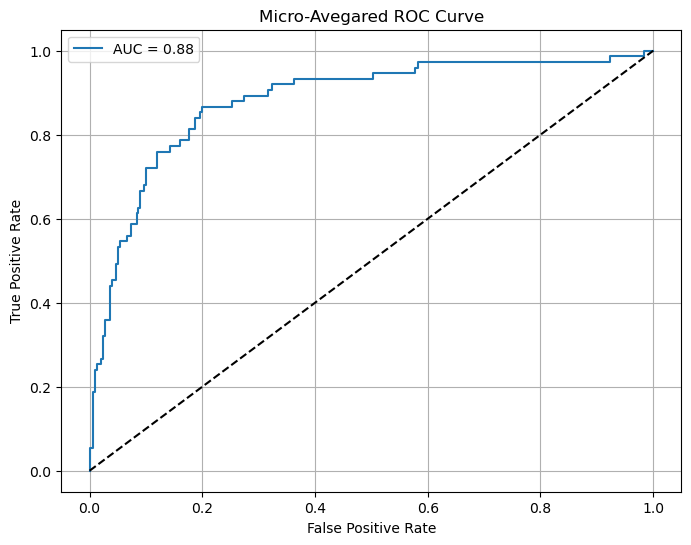

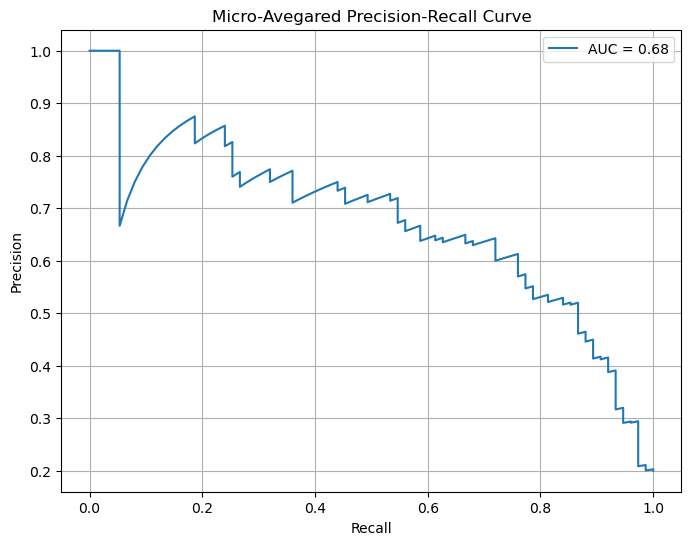

In [11]:
# Create a classifier
best_params= {'C': 1.982645393948521, 'gamma': 0.00010047923578072409}
clf = SVC(**best_params, random_state=42, probability=True)

X_train=pd.read_csv("X_train.csv", index_col="ID")
X_test=pd.read_csv("X_test.csv", index_col="ID")
y_train= y_train_inss_encode.copy()
y_test= y_test_inss_encode.copy()
original_labels = label_encoder.inverse_transform(y_test_inss_encode)
class_labels= np.unique(original_labels)

# Train the Random Forest classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_probs = clf.predict_proba(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

# Calculate ROC-AUC for this fold
y_true_binary = np.zeros_like(y_pred_probs)
y_true_binary[np.arange(y_pred_probs.shape[0]), y_test] = 1
fpr, tpr, _ = roc_curve(y_true_binary.ravel(), y_pred_probs.ravel())
roc_auc = roc_auc_score(y_true_binary.ravel(), y_pred_probs.ravel())

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
print("Confusion Matrix:")
print(confusion_matrix_df)

# Calculate Precision-Recall values
precision_fold, recall_fold, _ = precision_recall_curve(y_true_binary.ravel(), y_pred_probs.ravel())

# Calculate PR-AUC for this fold
pr_auc = average_precision_score(y_true_binary.ravel(), y_pred_probs.ravel())

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)
print("PR-AUC:", pr_auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-Avegared ROC Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_fold, precision_fold, label=f'AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Micro-Avegared Precision-Recall Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

#### LOGISTIC REGRESSION MODEL EVALUATION FOR ALL FEATURES

Confusion Matrix:
     1  2  3   4  4S
1   23  0  0   1   0
2    0  0  0   2   0
3    0  0  0   6   0
4    0  0  0  30   0
4S   0  0  0   1  12
Accuracy: 0.8666666666666667
Precision: 0.8666666666666667
Recall: 0.8666666666666667
F1-score: 0.8666666666666667
ROC-AUC: 0.9637777777777777
PR-AUC: 0.910088667100261


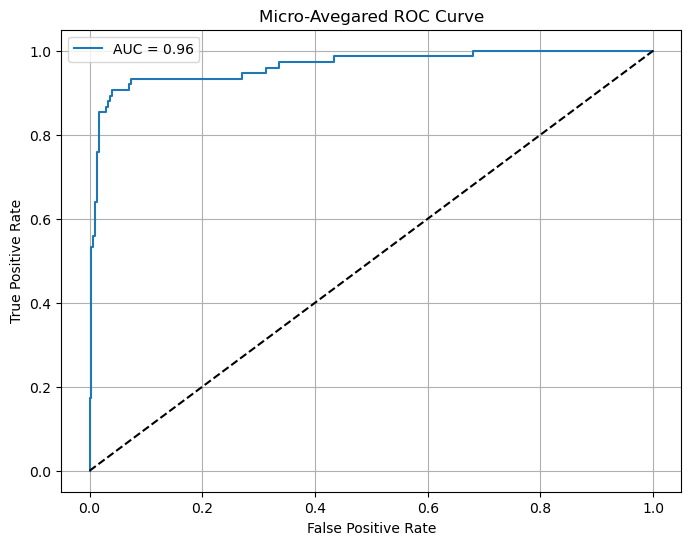

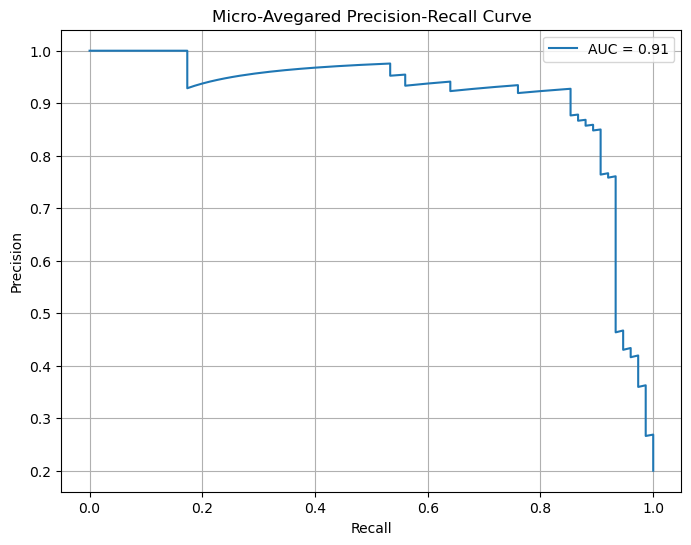

In [12]:
# Create a classifier
best_params= {'C': 0.23357214690901212, 'penalty': 'l1', 'solver': 'liblinear'}
clf = LogisticRegression(**best_params, random_state=42)

X_train=pd.read_csv("X_train.csv", index_col="ID")
X_test=pd.read_csv("X_test.csv", index_col="ID")
y_train= y_train_inss_encode.copy()
y_test= y_test_inss_encode.copy()
original_labels = label_encoder.inverse_transform(y_test_inss_encode)
class_labels= np.unique(original_labels)

# Train the Random Forest classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_probs = clf.predict_proba(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

# Calculate ROC-AUC for this fold
y_true_binary = np.zeros_like(y_pred_probs)
y_true_binary[np.arange(y_pred_probs.shape[0]), y_test] = 1
fpr, tpr, _ = roc_curve(y_true_binary.ravel(), y_pred_probs.ravel())
roc_auc = roc_auc_score(y_true_binary.ravel(), y_pred_probs.ravel())

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
print("Confusion Matrix:")
print(confusion_matrix_df)

# Calculate Precision-Recall values
precision_fold, recall_fold, _ = precision_recall_curve(y_true_binary.ravel(), y_pred_probs.ravel())

# Calculate PR-AUC for this fold
pr_auc = average_precision_score(y_true_binary.ravel(), y_pred_probs.ravel())

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)
print("PR-AUC:", pr_auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-Avegared ROC Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_fold, precision_fold, label=f'AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Micro-Avegared Precision-Recall Curve')
plt.legend(loc='best')
plt.grid()
plt.show()